# Business Problem

This case requires to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
cust_data = pd.read_csv('CC_GENERAL.csv')

In [3]:
cust_data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

### Data Inspection

In [5]:
#convert column names to lower case for easy interpretation
cust_data.columns = cust_data.columns.str.lower()

In [6]:
cust_data.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [7]:
cust_data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
## Create important derived variables

def month_avg_purchase(prch, tenure):
    return prch/tenure

def month_cash_advance(cash, tenure):
    return cash/tenure

def monthly_usage(blnc, limit):
    return blnc/limit

def prch_type(x, y):
    if ((x <= 0) & (y <= 0)):
        return 'none'
    elif((x > 0) & (y <= 0)):
        return 'one_off'
    elif((x <= 0) & (y > 0)):
        return 'installments'
    elif((x > 0) & (y > 0)):
        return 'both'
        

In [9]:
cust_data['monthly_avg_purchase'] = cust_data.apply(lambda x : month_avg_purchase(x['purchases'], x['tenure']), axis = 1)
cust_data['monthly_cash_advance'] = cust_data.apply(lambda x : month_cash_advance(x['cash_advance'], x['tenure']), axis = 1)
cust_data['monthly_usage'] = cust_data.apply(lambda x : monthly_usage(x['balance'], x['credit_limit']), axis = 1)
cust_data['purchase_type'] = cust_data.apply(lambda x : prch_type(x['oneoff_purchases'], x['installments_purchases']), axis = 1)


In [10]:
cust_data.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,installments
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,one_off


In [11]:
##Renaming the columns for better undersatnding
#purchases_frequency - freq of months wth atleast 1 purcase
#balance_frequency - balance in last 12months/ balance

cust_data.rename(columns = {'balance' : 'avg_monthly_balance'}, inplace=True)

In [12]:
cust_data.head()

,cust_id,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,installments
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,one_off


### Profiling

In [13]:
import pandas_profiling
#cust = cust_data.profile_report()
#cust.to_file(output_file = 'cust_segmentation_profile.html')

From here we can see that Purchases is highly correlated with one-off purchases variable

### Identify Categorical and continous variables

In [14]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
cust_id                             8950 non-null object
avg_monthly_balance                 8950 non-null float64
balance_frequency                   8950 non-null float64
purchases                           8950 non-null float64
oneoff_purchases                    8950 non-null float64
installments_purchases              8950 non-null float64
cash_advance                        8950 non-null float64
purchases_frequency                 8950 non-null float64
oneoff_purchases_frequency          8950 non-null float64
purchases_installments_frequency    8950 non-null float64
cash_advance_frequency              8950 non-null float64
cash_advance_trx                    8950 non-null int64
purchases_trx                       8950 non-null int64
credit_limit                        8949 non-null float64
payments                            8950 non-null float64
minimum_payments            

In [15]:
numeric_var_names=[key for key in dict(cust_data.dtypes) if dict(cust_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(cust_data.dtypes) if dict(cust_data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['avg_monthly_balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure', 'monthly_avg_purchase', 'monthly_cash_advance', 'monthly_usage']
['cust_id', 'purchase_type']


In [16]:
cust_data.isna().sum()

cust_id                               0
avg_monthly_balance                   0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
monthly_avg_purchase                  0
monthly_cash_advance                  0
monthly_usage                         1
purchase_type                         0
dtype: int64

### Data audit report

In [17]:
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),x.std(),
                      x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25),
                      x.quantile(0.50), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), 
                      x.quantile(0.99), x.max()],
                    index = ['N', 'NMiss', 'Sum', 'Mean', 'Median', 'SD', 'Var', 'Min', 'P1', 'P5', 'P10','P25',
                            'P50', 'P75', 'P90', 'P95', 'P99', 'Max'])

In [18]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0,1],
                     round((Mode.iloc[0,1]*100)/x.count(), 2)],
                     index = ['N', 'NMiss', 'Mode', 'Freq', 'Percent'])

In [19]:
cust_data[numeric_var_names].apply(lambda x : continous_var_summary(x)).T.round(1)

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_monthly_balance,8950.0,0.0,14002049.7,1564.5,873.4,2081.5,4332775.0,0.0,0.1,8.8,23.6,128.3,873.4,2054.1,4338.6,5909.1,9338.8,19043.1
balance_frequency,8950.0,0.0,7851.6,0.9,1.0,0.2,0.1,0.0,0.1,0.3,0.5,0.9,1.0,1.0,1.0,1.0,1.0,1.0
purchases,8950.0,0.0,8978683.3,1003.2,361.3,2136.6,4565208.2,0.0,0.0,0.0,0.0,39.6,361.3,1110.1,2542.6,3998.6,8977.3,49039.6
oneoff_purchases,8950.0,0.0,5302314.5,592.4,38.0,1659.9,2755227.9,0.0,0.0,0.0,0.0,0.0,38.0,577.4,1600.1,2671.1,6689.9,40761.2
installments_purchases,8950.0,0.0,3679055.4,411.1,89.0,904.3,817827.4,0.0,0.0,0.0,0.0,0.0,89.0,468.6,1140.1,1750.1,3886.2,22500.0
cash_advance,8950.0,0.0,8760896.5,978.9,0.0,2097.2,4398096.3,0.0,0.0,0.0,0.0,0.0,0.0,1113.8,3065.5,4647.2,9588.2,47137.2
purchases_frequency,8950.0,0.0,4388.6,0.5,0.5,0.4,0.2,0.0,0.0,0.0,0.0,0.1,0.5,0.9,1.0,1.0,1.0,1.0
oneoff_purchases_frequency,8950.0,0.0,1812.0,0.2,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.3,0.8,1.0,1.0,1.0
purchases_installments_frequency,8950.0,0.0,3261.7,0.4,0.2,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.8,1.0,1.0,1.0,1.0
cash_advance_frequency,8950.0,0.0,1209.5,0.1,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.6,0.8,1.5


In [20]:
cust_data[cat_var_names].apply(lambda x : categorical_var_summary(x)).T.round(1)

,N,NMiss,Mode,Freq,Percent
cust_id,8950,0,C10925,1,0.01
purchase_type,8950,0,both,2774,30.99


### Data Cleaning

#### 1. Outlier treatment

In [21]:
#Handling Outliers - at 99%tile or 95%tile if required 
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

In [22]:
cust_data[numeric_var_names]=cust_data[numeric_var_names].apply(lambda x: outlier_capping(x))

#### 2. Missing value imputation

In [23]:
#Handling missings 
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

In [24]:
cust_data[numeric_var_names]=cust_data[numeric_var_names].apply(lambda x: Missing_imputation(x))

In [25]:
cust_data[numeric_var_names].apply(lambda x : continous_var_summary(x)).round(3).T

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_monthly_balance,8950.0,0.0,1.299898e+07,1452.400,873.385,1688.929,2.852482e+06,8.815,8.815,8.817,23.576,128.282,873.385,2054.140,4338.564,5907.795,5909.112,5909.112
balance_frequency,8950.0,0.0,7.905106e+03,0.883,1.000,0.218,4.800000e-02,0.273,0.273,0.273,0.455,0.889,1.000,1.000,1.000,1.000,1.000,1.000
purchases,8950.0,0.0,7.373574e+06,823.863,361.280,1099.813,1.209589e+06,0.000,0.000,0.000,0.000,39.635,361.280,1110.130,2542.624,3997.904,3998.619,3998.619
oneoff_purchases,8950.0,0.0,4.009141e+06,447.949,38.000,746.134,5.567153e+05,0.000,0.000,0.000,0.000,0.000,38.000,577.405,1600.099,2668.946,2671.094,2671.094
installments_purchases,8950.0,0.0,3.010208e+06,336.336,89.000,497.830,2.478349e+05,0.000,0.000,0.000,0.000,0.000,89.000,468.637,1140.070,1748.442,1750.087,1750.087
cash_advance,8950.0,0.0,7.313592e+06,817.161,0.000,1349.178,1.820282e+06,0.000,0.000,0.000,0.000,0.000,0.000,1113.821,3065.535,4643.581,4647.169,4647.169
purchases_frequency,8950.0,0.0,4.388637e+03,0.490,0.500,0.401,1.610000e-01,0.000,0.000,0.000,0.000,0.083,0.500,0.917,1.000,1.000,1.000,1.000
oneoff_purchases_frequency,8950.0,0.0,1.811996e+03,0.202,0.083,0.298,8.900000e-02,0.000,0.000,0.000,0.000,0.000,0.083,0.300,0.750,1.000,1.000,1.000
purchases_installments_frequency,8950.0,0.0,3.261714e+03,0.364,0.167,0.397,1.580000e-01,0.000,0.000,0.000,0.000,0.000,0.167,0.750,1.000,1.000,1.000,1.000
cash_advance_frequency,8950.0,0.0,1.142355e+03,0.128,0.000,0.177,3.100000e-02,0.000,0.000,0.000,0.000,0.000,0.000,0.222,0.417,0.583,0.583,0.583


In [26]:
### Correlation Matrix

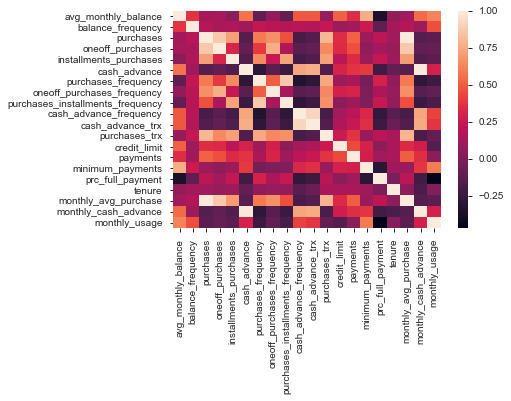

In [84]:
cust_corr = cust_data.corr()
#cust_corr.to_excel('cust_corr.xlsx')
sns.heatmap(cust_corr)

1. purchases with one off & monthly_avg_purchase
2. one-off with monthly_avg_purchase
3. cahs_adv wth monthly_cash advance

We can drop purchases column and cash_adv based on our finding from correlation matrix

#### 3. Dummy variable creation

In [28]:
#function for creating dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first= True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace= True)
    return df

In [29]:
cat_var_names = cust_data[cat_var_names].columns.difference(['cust_id'])
cat_var = cust_data[cat_var_names]
cat_var.head()

,purchase_type
0,installments
1,none
2,one_off
3,one_off
4,one_off


In [30]:
for c_feature in cat_var_names:
    cat_var[c_feature] = cat_var[c_feature].astype('category')
    cat_var = create_dummies(cat_var, c_feature)

C:\Users\Yoga 500\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
cat_var.head()

,purchase_type_installments,purchase_type_none,purchase_type_one_off
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


#### 4. Dropping unecessary variables

In [32]:
#As cust_id is unique and have no variance so it may add unecessary noise to our data. Hence we need to drop it

cust_data.drop(columns=['cust_id'], inplace=True)

### Combining numeric and categorical data

In [33]:
data_final = pd.concat([cust_data[numeric_var_names], cat_var], axis = 1)

In [34]:
data_final.head()

,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type_installments,purchase_type_none,purchase_type_one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.457495,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,89.988924,643.387510,0.000000,12,124.916667,17.149001,0.222223,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,0,0,1


### Standardizing the data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
data_final.columns

Index(['avg_monthly_balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure',
       'monthly_avg_purchase', 'monthly_cash_advance', 'monthly_usage',
       'purchase_type_installments', 'purchase_type_none',
       'purchase_type_one_off'],
      dtype='object')

In [37]:
#prescreening of variables to remove less useful vraiable for segmentation
data_feature = data_final.drop(columns=['purchases', 'cash_advance'], axis = 1)

In [38]:
sc = StandardScaler()

In [39]:
data_final_scaled = pd.DataFrame(sc.fit_transform(data_feature))

In [40]:
data_final_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.835783,-0.297904,-0.600394,-0.483999,-0.806490,-0.678661,-0.707313,-0.722502,-0.636381,-0.680426,...,-0.800356,-7.047677e-01,-0.525551,0.378995,-0.672440,-0.600126,-0.990035,1.720516,-0.543690,-0.514625
1,1.036257,0.118296,-0.600394,-0.675642,-1.221758,-0.678661,-0.916995,0.692644,0.295454,-0.807798,...,1.643245,5.999710e-01,0.234227,0.378995,-0.757187,2.868023,0.212119,-0.581221,1.839282,-0.514625
2,0.617437,0.534496,0.435900,-0.675642,1.269843,2.673451,-0.916995,-0.722502,-0.636381,-0.043563,...,-0.537116,-2.252268e-02,-0.525551,0.378995,-0.070357,-0.600126,-0.148038,-0.581221,-0.543690,1.943162
3,0.126875,-1.130304,1.408742,-0.675642,-1.014125,-0.399319,-0.916995,-0.250789,-0.403422,-0.744112,...,-0.870392,-1.590124e-16,-0.525551,0.378995,0.574420,-0.460364,-0.466800,-0.581221,-0.543690,1.943162
4,-0.375812,0.534496,-0.578948,-0.675642,-1.014125,-0.399319,-0.916995,-0.722502,-0.636381,-0.744112,...,-0.501872,-5.575118e-01,-0.525551,0.378995,-0.742974,-0.600126,0.858316,-0.581221,-0.543690,1.943162


### Applying PCA to reduce the variables

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=21)
pca.fit(data_final_scaled)

PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.explained_variance_ 

array([5.73228018, 4.44153355, 2.27385031, 1.59425874, 1.17268958,
       1.10860598, 0.87407236, 0.70617091, 0.65971489, 0.47907863,
       0.43139694, 0.35085559, 0.22461165, 0.20929513, 0.20213626,
       0.16982207, 0.12919335, 0.10642866, 0.07567357, 0.03843819,
       0.0222401 ])

In [44]:
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_
var

array([0.27293522, 0.21147797, 0.10826649, 0.0759086 , 0.05583612,
       0.05278486, 0.04161784, 0.03362343, 0.03141148, 0.02281072,
       0.02054042, 0.01670554, 0.0106946 , 0.00996532, 0.00962446,
       0.00808586, 0.00615138, 0.00506747, 0.0036031 , 0.00183019,
       0.00105893])

In [45]:
#cummilative var explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_ , decimals=4)*100)
var1

array([ 27.29,  48.44,  59.27,  66.86,  72.44,  77.72,  81.88,  85.24,
        88.38,  90.66,  92.71,  94.38,  95.45,  96.45,  97.41,  98.22,
        98.84,  99.35,  99.71,  99.89, 100.  ])

In [46]:
pd.DataFrame({'Eigen Values' : pca.explained_variance_, 'Cumulative Variance' : var1}, index=range(1,22))

,Eigen Values,Cumulative Variance
1,5.732280,27.29
2,4.441534,48.44
3,2.273850,59.27
4,1.594259,66.86
5,1.172690,72.44
6,1.108606,77.72
7,0.874072,81.88
8,0.706171,85.24
9,0.659715,88.38
10,0.479079,90.66


either 7 or 8 seems a perfect candidate for no of componenets in our clustering model

In [47]:
pca_final = PCA(n_components=7).fit(data_final_scaled)

In [48]:
pca_final.explained_variance_

array([5.73228018, 4.44153355, 2.27385031, 1.59425874, 1.17268958,
       1.10860598, 0.87407236])

In [49]:
reduced_cr = pca_final.fit_transform(data_final_scaled)

In [50]:
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ["C1", "C2", "C3", "C4", "C5","C6", "C7"]

In [51]:
print(dimensions.shape)
print(dimensions.head())

(8950, 7)
         C1        C2        C3        C4        C5        C6        C7
0 -0.728270 -2.807740 -0.531668 -0.307630 -0.523200  0.189993 -0.156856
1 -2.924920  2.113690 -0.119397  1.742455 -1.269529 -0.891846  0.059966
2  1.076890  0.457087  2.587509 -1.728665 -0.230438  1.092706 -0.556645
3 -0.497875 -0.404395  2.615011 -0.522530 -1.163923  1.038045  0.630966
4 -1.470361 -1.386808  1.409172 -2.032670  0.046599  0.438309 -0.629525


## Clustering model(k-means)

In [52]:
from sklearn.cluster import KMeans

In [53]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3.fit(dimensions)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [54]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(dimensions)
km_5 = KMeans(n_clusters=5, random_state=123).fit(dimensions)
km_6 = KMeans(n_clusters=6, random_state=123).fit(dimensions)
km_7 = KMeans(n_clusters=7, random_state=123).fit(dimensions)
km_8 = KMeans(n_clusters=8, random_state=123).fit(dimensions)
km_9 = KMeans(n_clusters=9, random_state=123).fit(dimensions)

In [55]:
# save the cluster labels and sort by cluster
data_final['cluster_3'] = km_3.labels_
data_final['cluster_4'] = km_4.labels_
data_final['cluster_5'] = km_5.labels_
data_final['cluster_6'] = km_6.labels_
data_final['cluster_7'] = km_7.labels_
data_final['cluster_8'] = km_8.labels_
data_final['cluster_9'] = km_9.labels_

In [56]:
data_final.head(10)

,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,purchase_type_installments,purchase_type_none,purchase_type_one_off,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,40.900749,0.818182,95.4000,0.000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1,0,0,2,2,3,1,1,3,4
1,3202.467416,0.909091,0.0000,0.000,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0,1,0,1,3,2,2,0,2,6
2,2495.148862,1.000000,773.1700,773.170,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0,0,1,2,1,0,4,4,0,5
3,1666.670542,0.636364,1499.0000,1499.000,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0,0,1,2,1,0,4,4,0,5
4,817.714335,1.000000,16.0000,16.000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0,0,1,2,1,0,4,4,0,5
5,1809.828751,1.000000,1333.2800,0.000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,1,0,0,2,2,3,5,5,7,1
6,627.260806,1.000000,3998.6195,2671.094,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,0,0,0,0,0,1,3,3,1,0
7,1823.652743,1.000000,436.2000,0.000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,1,0,0,2,2,3,5,5,7,1
8,1014.926473,1.000000,861.4900,661.490,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,0,0,0,2,1,0,4,4,0,5
9,152.225975,0.545455,1281.6000,1281.600,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,0,0,1,2,1,0,4,4,3,4


### Segment Size check

In [57]:
data_final['cluster_3'].value_counts()

2    4328
1    2962
0    1660
Name: cluster_3, dtype: int64

In [58]:
data_final['cluster_3'].value_counts()/sum(data_final['cluster_3'].value_counts())

2    0.483575
1    0.330950
0    0.185475
Name: cluster_3, dtype: float64

In [59]:
data_final['cluster_4'].value_counts()/sum(data_final['cluster_4'].value_counts())

2    0.308939
3    0.293855
1    0.229385
0    0.167821
Name: cluster_4, dtype: float64

In [60]:
data_final['cluster_5'].value_counts()/sum(data_final['cluster_5'].value_counts())

3    0.309050
0    0.213408
4    0.190279
1    0.157989
2    0.129274
Name: cluster_5, dtype: float64

In [61]:
data_final['cluster_6'].value_counts()/sum(data_final['cluster_6'].value_counts())

1    0.213073
4    0.190391
0    0.187598
5    0.153408
3    0.139888
2    0.115642
Name: cluster_6, dtype: float64

Here we can choose 5-6 cluster solution as optimum solution

### Quantitative Evaluation

### 1. Silhouette Coefficient(Higher the better)

In [62]:
from sklearn import  metrics

In [63]:
metrics.silhouette_score(dimensions, labels=km_3.labels_)

0.24807702578451868

In [64]:
k_range = range(2, 16)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, labels=km.labels_))

In [65]:
scores

[0.22479194763500973,
 0.24807702578451868,
 0.24488682606947232,
 0.2705014956495331,
 0.25691526859178476,
 0.25451455181763943,
 0.23782484792343908,
 0.24450672735407164,
 0.24151978187061146,
 0.23507670122145827,
 0.23444988710916698,
 0.23804791270078698,
 0.23567548026745372,
 0.23870043007229763]

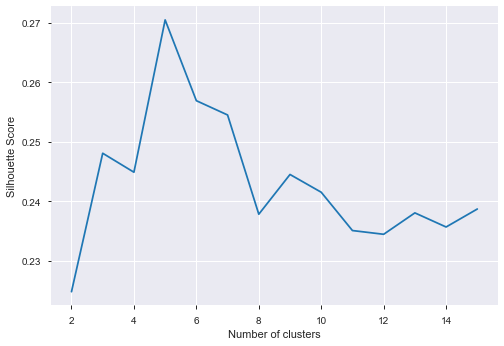

In [66]:
plt.plot( k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid('True')

Here 5 cluter seems optimal solution as the sc score is highest around it.

### 2. Elbow Analysis

In [67]:
cluster_range= range(2, 20)
errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(dimensions)
    errors.append(clusters.inertia_)

In [68]:
errors

[118340.37594123404,
 93567.2045943918,
 80317.03794560517,
 69547.86058867673,
 63815.93438889675,
 59676.798899611225,
 56419.66547727911,
 53645.81951577501,
 50749.90199843937,
 48291.07431467537,
 46110.68219141723,
 44268.93491783479,
 42533.19761143498,
 41015.16419248595,
 39310.99047737178,
 37908.09052355304,
 36810.604186055614,
 35697.975556926474]

In [69]:
clusters_df = pd.DataFrame({'Cluster_no' : range(2, 20), 'Unexpalined_variance' : errors})
clusters_df[0:10]

,Cluster_no,Unexpalined_variance
0,2,118340.375941
1,3,93567.204594
2,4,80317.037946
3,5,69547.860589
4,6,63815.934389
5,7,59676.798900
6,8,56419.665477
7,9,53645.819516
8,10,50749.901998
9,11,48291.074315


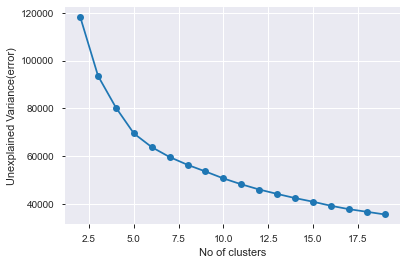

In [70]:
%matplotlib inline
plt.plot(clusters_df.Cluster_no, clusters_df.Unexpalined_variance, marker = 'o')
plt.xlabel('No of clusters')
plt.ylabel('Unexplained Variance(error)')
plt.grid('True')


Here after cluster 7 the incremental decrease in error is almost constant

### Qualitative Analysis(Profiling)

In [71]:
data_final.head()

,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,purchase_type_installments,purchase_type_none,purchase_type_one_off,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1,0,0,2,2,3,1,1,3,4
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0,1,0,1,3,2,2,0,2,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0,0,1,2,1,0,4,4,0,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0,0,1,2,1,0,4,4,0,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0,0,1,2,1,0,4,4,0,5


In [72]:
size = pd.concat([pd.Series(data_final.cluster_3.size), pd.Series(data_final.cluster_3.value_counts()).sort_index(), pd.Series(data_final.cluster_4.value_counts()).sort_index(),
          pd.Series(data_final.cluster_5.value_counts()).sort_index(), pd.Series(data_final.cluster_6.value_counts()).sort_index(), pd.Series(data_final.cluster_7.value_counts()).sort_index(),
          pd.Series(data_final.cluster_8.value_counts()).sort_index(), pd.Series(data_final.cluster_9.value_counts()).sort_index()])
size

0    8950
0    1660
1    2962
2    4328
0    1502
1    2053
2    2765
3    2630
0    1910
1    1414
2    1157
3    2766
4    1703
0    1679
1    1907
2    1035
3    1252
4    1704
5    1373
0    1047
1    1834
2     477
3    1019
4    1659
5    1320
6    1594
0    1276
1    1006
2     949
3     977
4    1496
5    1559
6     464
7    1223
0    1011
1    1110
2    1583
3    1314
4     933
5    1252
6     871
7     410
8     466
dtype: int64

In [73]:
Seg_size = pd.DataFrame(size, columns=['seg_size'])
Seg_pct = pd.DataFrame(size/data_final.cluster_3.size, columns= ['Seg_pct'])

In [74]:
pd.concat([Seg_size.T, Seg_pct.T], axis = 0)

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
seg_size,8950.0,1660.000000,2962.00000,4328.000000,1502.000000,2053.000000,2765.000000,2630.000000,1910.000000,1414.000000,...,1223.000000,1011.000000,1110.000000,1583.000000,1314.000000,933.000000,1252.000000,871.000000,410.00000,466.000000
Seg_pct,1.0,0.185475,0.33095,0.483575,0.167821,0.229385,0.308939,0.293855,0.213408,0.157989,...,0.136648,0.112961,0.124022,0.176872,0.146816,0.104246,0.139888,0.097318,0.04581,0.052067


In [75]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profiling_output = pd.concat([data_final.apply(lambda x: x.mean()).T, data_final.groupby('cluster_3').apply(lambda x : x.mean()).T,
                             data_final.groupby('cluster_4').apply(lambda x : x.mean()).T, data_final.groupby('cluster_5').apply(lambda x : x.mean()).T, 
                             data_final.groupby('cluster_6').apply(lambda x : x.mean()).T, data_final.groupby('cluster_7').apply(lambda x : x.mean()).T,
                             data_final.groupby('cluster_8').apply(lambda x : x.mean()).T, data_final.groupby('cluster_9').apply(lambda x : x.mean()).T], axis =1)

In [76]:
Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,7,0,1,2,3,4,5,6,7,8
avg_monthly_balance,1452.399593,2044.841335,2458.788770,536.415759,2083.865594,848.435499,531.589475,2531.303140,935.545571,1906.978104,...,1691.830038,797.131744,1791.960309,137.054477,1584.089931,100.567015,1236.028381,4282.460294,1305.664021,4289.414362
balance_frequency,0.883252,0.976419,0.932527,0.813796,0.979277,0.798182,0.844564,0.935492,0.830193,0.979139,...,0.988736,0.969122,0.991837,0.850021,0.942348,0.428200,0.963083,0.975847,0.790871,0.989366
purchases,823.863022,2724.435130,170.445216,542.087107,2808.235884,572.085259,577.351392,146.287494,606.971459,2855.387047,...,711.776214,2636.888349,713.417063,579.908212,6.795350,321.002679,655.931588,339.396808,162.661390,3231.406777
oneoff_purchases,447.948730,1579.168993,117.524663,240.206227,1634.606324,533.149231,76.557244,94.192503,567.820498,1671.720076,...,218.603663,1597.171610,197.217937,43.659172,4.567314,242.691848,628.968701,226.598055,110.054756,1811.126910
installments_purchases,336.336040,947.478238,52.402278,296.251880,979.235528,30.972426,484.750347,51.511292,30.591131,988.420357,...,475.811615,870.705596,496.578678,518.512892,2.228037,76.908968,15.494513,109.512121,52.606634,1173.560832
cash_advance,817.161146,575.512349,1967.483611,122.586715,589.881692,257.511572,153.066865,2082.010955,262.150065,399.669869,...,459.211540,117.557236,460.698608,38.263393,1115.950849,189.566877,348.304012,3542.066548,1970.183482,1396.090893
purchases_frequency,0.490351,0.916379,0.134641,0.570389,0.926558,0.321995,0.733642,0.116871,0.342478,0.929890,...,0.723397,0.922667,0.728448,0.800954,0.005102,0.197589,0.371817,0.244822,0.189422,0.926740
oneoff_purchases_frequency,0.202458,0.607826,0.065493,0.140715,0.629843,0.289312,0.048924,0.051993,0.310190,0.643794,...,0.130383,0.667689,0.117473,0.032263,0.002099,0.098424,0.359128,0.114924,0.080989,0.596514
purchases_installments_frequency,0.364437,0.702681,0.073486,0.433826,0.727930,0.045585,0.683574,0.070226,0.046185,0.730258,...,0.643927,0.681189,0.657563,0.750762,0.003188,0.096532,0.020255,0.144689,0.112730,0.778594
cash_advance_frequency,0.127637,0.082850,0.297974,0.028241,0.084337,0.057983,0.030503,0.308860,0.061989,0.063580,...,0.096266,0.028592,0.092552,0.007994,0.218984,0.021598,0.080260,0.433264,0.320190,0.173884


In [77]:
Profiling_output_final=pd.concat([Seg_size.T, Seg_pct.T, Profiling_output], axis=0)
Profiling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',
                                'KM9_1', 'KM9_2', 'KM9_3', 'KM9_4', 'KM9_5','KM9_6','KM9_7','KM9_8', 'KM9_9']

In [78]:
Profiling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM8_8,KM9_1,KM9_2,KM9_3,KM9_4,KM9_5,KM9_6,KM9_7,KM9_8,KM9_9
seg_size,8950.000000,1660.000000,2962.000000,4328.000000,1502.000000,2053.000000,2765.000000,2630.000000,1910.000000,1414.000000,...,1223.000000,1011.000000,1110.000000,1583.000000,1314.000000,933.000000,1252.000000,871.000000,410.000000,466.000000
Seg_pct,1.000000,0.185475,0.330950,0.483575,0.167821,0.229385,0.308939,0.293855,0.213408,0.157989,...,0.136648,0.112961,0.124022,0.176872,0.146816,0.104246,0.139888,0.097318,0.045810,0.052067
avg_monthly_balance,1452.399593,2044.841335,2458.788770,536.415759,2083.865594,848.435499,531.589475,2531.303140,935.545571,1906.978104,...,1691.830038,797.131744,1791.960309,137.054477,1584.089931,100.567015,1236.028381,4282.460294,1305.664021,4289.414362
balance_frequency,0.883252,0.976419,0.932527,0.813796,0.979277,0.798182,0.844564,0.935492,0.830193,0.979139,...,0.988736,0.969122,0.991837,0.850021,0.942348,0.428200,0.963083,0.975847,0.790871,0.989366
purchases,823.863022,2724.435130,170.445216,542.087107,2808.235884,572.085259,577.351392,146.287494,606.971459,2855.387047,...,711.776214,2636.888349,713.417063,579.908212,6.795350,321.002679,655.931588,339.396808,162.661390,3231.406777
oneoff_purchases,447.948730,1579.168993,117.524663,240.206227,1634.606324,533.149231,76.557244,94.192503,567.820498,1671.720076,...,218.603663,1597.171610,197.217937,43.659172,4.567314,242.691848,628.968701,226.598055,110.054756,1811.126910
installments_purchases,336.336040,947.478238,52.402278,296.251880,979.235528,30.972426,484.750347,51.511292,30.591131,988.420357,...,475.811615,870.705596,496.578678,518.512892,2.228037,76.908968,15.494513,109.512121,52.606634,1173.560832
cash_advance,817.161146,575.512349,1967.483611,122.586715,589.881692,257.511572,153.066865,2082.010955,262.150065,399.669869,...,459.211540,117.557236,460.698608,38.263393,1115.950849,189.566877,348.304012,3542.066548,1970.183482,1396.090893
purchases_frequency,0.490351,0.916379,0.134641,0.570389,0.926558,0.321995,0.733642,0.116871,0.342478,0.929890,...,0.723397,0.922667,0.728448,0.800954,0.005102,0.197589,0.371817,0.244822,0.189422,0.926740
oneoff_purchases_frequency,0.202458,0.607826,0.065493,0.140715,0.629843,0.289312,0.048924,0.051993,0.310190,0.643794,...,0.130383,0.667689,0.117473,0.032263,0.002099,0.098424,0.359128,0.114924,0.080989,0.596514


In [79]:
Profiling_output_final.to_csv('Profiling_output1.csv')

From profiling we conclude that *__8 cluster solution__* seems the best one. Below is the detailed characteristic description of each cluster for future marketing strategy-

**Cluster 0** - These include customers with average credit limit who are mostly involved in one off type of purchases with their credit cards. They dont prefer cash transactions on their cards. They maybe targeted for offers on different partner outlets.

**Cluster 1** - These are the customers with high credit limit who spend alot on purchases of both installment and one-off type. Amount and number of transactions are quite high for these card holders. As a result the balance is quite low for them.

**Cluster 2** -  This cluster targets a group of customers who have a high balance and cash advances with low purchase frequency. We can assume that this customer segment uses their credit cards as a loan facility.

**Cluster 3** - This cluster includes uninvolved customers which rarely use their cards and that also on small amount of purchases. Hence they have low minimun payments inspite of decent credit limit. We may target them to diffrenet market strategies like emi/installments purchases.

**Cluster 4** - These customers are similar to cluster no. 2 but with lower balance and lower credit limit.

**Cluster 5** - These customers purchase frequently with highest amount of installment purchases contrast of a lower cash advance percentage. They have lower credit limit maybe that is the reason for not spending on other type of services. Also they pay their bill on time compared to other customers.

**Cluster 6** - These are the customers who frequently use all the services with high amount whether it be any kind of purchase or cash transactions. They have the highest credit limit and minimun payment. In short these are the involved customers.

**Cluster 7** -  These customers are almost similar to cluster no. 5 but with higher minimum payment and they don't pay their bill on time.